In [ ]:
import pandas as pd 
import numpy as np 


df = pd.read_csv(r"D:\portfolio\Fractal MMM\Assignment\PYQ2\data\mmm_data_cleaned.csv")

# Adstock Transformation

In [2]:
# Function to apply the geometric adstock transformation
def adstock_transformation(media_spends, decay_rate):
    adstock = np.zeros_like(media_spends)
    adstock[0] = media_spends[0]
    for t in range(1, len(media_spends)):
        adstock[t] = media_spends[t] + decay_rate * adstock[t-1]
    return adstock

In [3]:
# Columns related to media spends
media_columns = [
    'Email Spends',
    'Modular Video Spends',
    'Paid Social Spends',
    'Paid Search Spends'
]

# Target variable (Sales)
target_column = 'Sales'

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Function to find the optimal decay rate for a given media column
def find_optimal_decay_rate(media_spends, target, decay_rate_range=(0.1, 0.9), num_steps=9):
    best_decay_rate = 0
    best_mse = float('inf')
    
    # Step size for grid search
    decay_rates = np.linspace(decay_rate_range[0], decay_rate_range[1], num_steps)
    
    for decay_rate in decay_rates:
        # Apply adstock transformation
        transformed_media_spends = adstock_transformation(media_spends, decay_rate)
        
        # Fit a simple linear regression model
        model = LinearRegression()
        model.fit(transformed_media_spends.reshape(-1, 1), target)
        
        # Predict and calculate MSE
        predictions = model.predict(transformed_media_spends.reshape(-1, 1))
        mse = mean_squared_error(target, predictions)
        
        if mse < best_mse:
            best_mse = mse
            best_decay_rate = decay_rate
    
    return best_decay_rate, best_mse


In [5]:
# Fill missing values with 0 for the relevant columns
df = df.fillna(0)

In [6]:
# Re-run the process to find optimal decay rates with missing values filled
optimal_decay_rates = {}
for media_column in media_columns:
    media_spends = df[media_column].values
    target = df[target_column].values
    best_decay_rate, best_mse = find_optimal_decay_rate(media_spends, target)
    optimal_decay_rates[media_column] = {
        'Best Decay Rate (λ)': best_decay_rate,
        'Best MSE': best_mse
    }

# Display the results
optimal_decay_rates

{'Email Spends': {'Best Decay Rate (λ)': 0.6, 'Best MSE': 22815565553712.99},
 'Modular Video Spends': {'Best Decay Rate (λ)': 0.9,
  'Best MSE': 21888977743522.99},
 'Paid Social Spends': {'Best Decay Rate (λ)': 0.2,
  'Best MSE': 20103837517334.99},
 'Paid Search Spends': {'Best Decay Rate (λ)': 0.30000000000000004,
  'Best MSE': 16469818220173.26}}

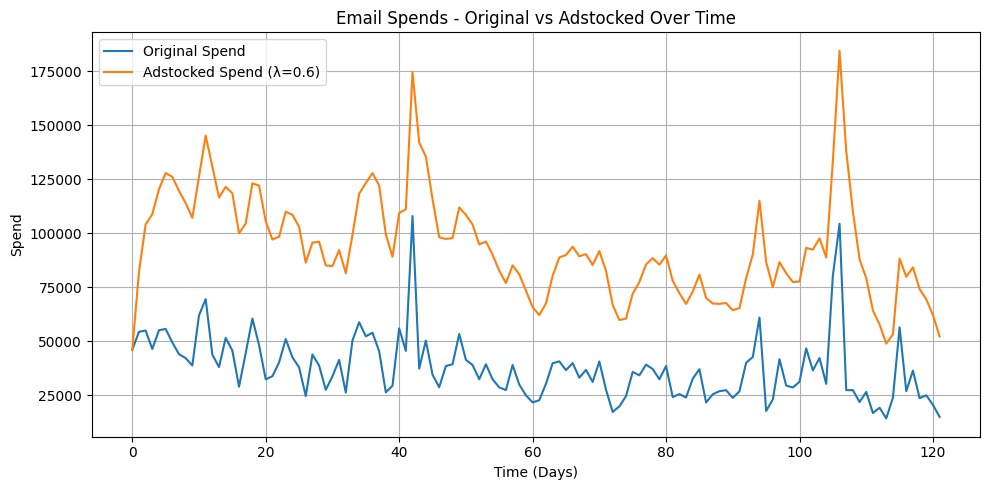

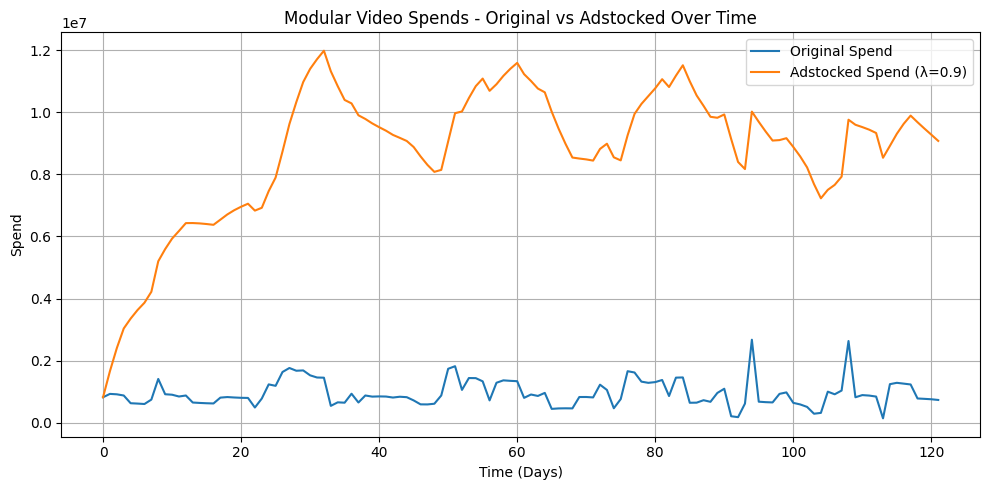

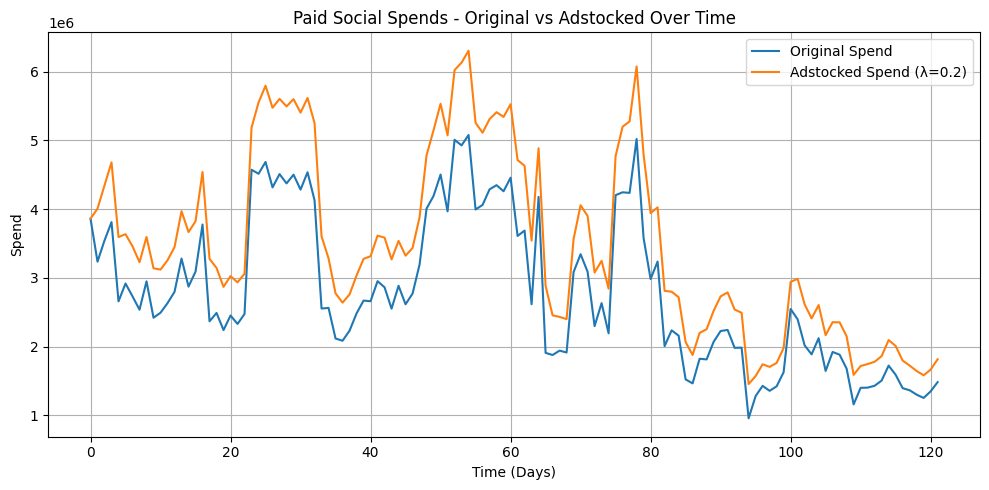

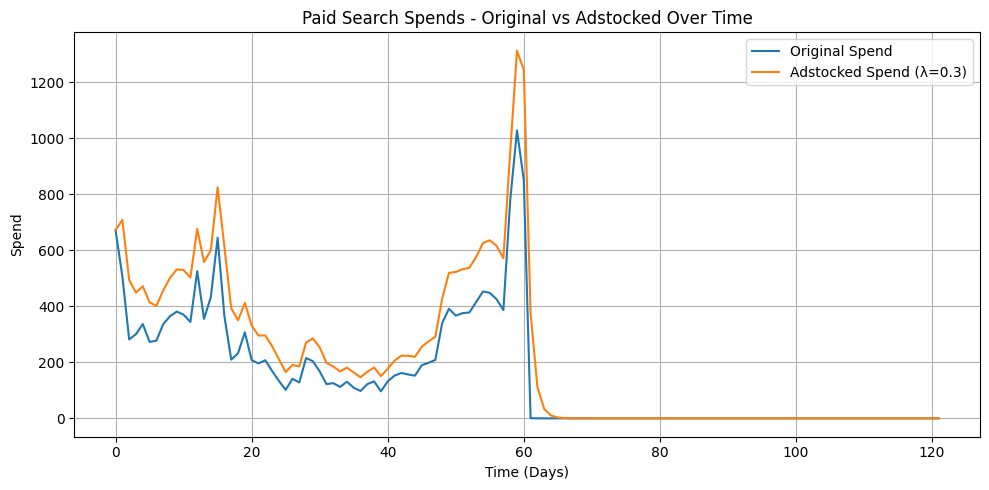

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Best decay rates from optimization
best_decay_rates = {
    'Email Spends': 0.6,
    'Modular Video Spends': 0.9,
    'Paid Social Spends': 0.2,
    'Paid Search Spends': 0.3
}

df_spends = df[['Email Spends', 'Modular Video Spends', 'Paid Social Spends', 'Paid Search Spends']]

# Apply adstock transformation with best decay rates and store for plotting
adstock_results = {}
for column, decay_rate in best_decay_rates.items():
    adstock_results[column] = adstock_transformation(df_spends[column].values, decay_rate)

# Plotting
for column in df_spends.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(df_spends[column], label='Original Spend')
    plt.plot(adstock_results[column], label=f'Adstocked Spend (λ={best_decay_rates[column]})')
    plt.title(f"{column} - Original vs Adstocked Over Time")
    plt.xlabel("Time (Days)")
    plt.ylabel("Spend")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Email
1. **Smoothing Effect**
    
    - The **adstocked spend** (orange line) is much smoother than the **original spend** (blue line).
    - This is expected because adstock carries over the impact from previous days, reducing sharp fluctuations.
2. **Lagging Impact**
    
    - Peaks in the original spend are **followed by gradual declines** in the adstocked line instead of sharp drops.
    - This represents the **lingering effect of media**, where email campaigns don’t lose effectiveness immediately.
3. **Decay Rate Behavior (λ = 0.6)**
    
    - A decay rate of **0.6** shows a **moderate carryover effect**.
    - Each day, 60% of the previous day's impact continues to influence the current day.
    - This creates a **balance**: it doesn’t fade too quickly, nor does it overly persist.
4. **Adstock Highlights Sustained Campaigns**
    
    - When the original spend stays high for a while, the adstock line builds up and **maintains higher values**.
    - Great for identifying sustained campaigns that may have a **compounding impact** on consumer behavior.



**Email marketing has a medium carryover**, meaning its effect **lasts a few days** but isn’t extremely long-lasting. This matches how users typically interact with email—quick open, then drop-off.



**Modular Video**

1. **Very Strong Carryover Effect**
    
    - With a **high decay rate of 0.9**, the adstocked spend (orange) accumulates rapidly and holds onto previous impacts for a long time.
    - the adstock line **rises steadily, even when the original spend (blue) fluctuates or drops.
2. **Lag is Prominent**
    
    - When original spend dips, the adstock line **barely dips**, indicating that the past influence is still dominating.
    - This behavior reflects **slow fading memory** — great for awareness-building channels.
3. **Amplification of Long-Term Impact**
    
    - Peaks in the original spend lead to **sustained high adstock values** even without repeated spikes.
    - This shows that Modular Video has a **long residual effect** — likely tied to high content engagement or broader reach.


- **Modular Video is behaving like a high-awareness media** (like TV or branded video), where the audience **remembers the message longer**.
	- With a λ = 0.9:
	    - 90% of yesterday’s impact carries forward today.
	    - It **emphasizes brand recall** and **long-lasting impressions**, not just short bursts of engagement.
- Modular Video doesn't need constant spend to maintain influence.



**Paid Social**

1. **Minimal Carryover Effect**
    
    - The adstocked spend (orange line) **closely follows the original spend** (blue line), just slightly smoothed.
    - This is because λ = 0.2 means **only 20%** of the previous day’s effect carries into the current day.
2. **Short-lived Impact**
    
    - The adstocked line **rises and falls quickly**, almost mirroring the spikes and drops of the original.
    - Paid Social here acts more like a **direct-response channel** rather than a long-term awareness builder.
3. **Quick Drop-offs**
    
    - After high spend spikes, the adstock line quickly falls back down—indicating **fast decay**.
    - This aligns with how social ads often work: they’re seen quickly, reacted to quickly, and forgotten quickly.

- **Paid Social has a fast-decaying impact**, suggesting it’s best used for:
    
    - Timely promotions,
    - Flash campaigns,
    - Event reminders.
- Since the effect doesn’t linger, it requires **frequent refreshing of creative and consistent spend** to maintain influence.


**Paid Search**

1. **Moderate-Fast Decay**
    
    - With λ = 0.3, the adstocked line (orange) **smooths out** the original spend (blue), but still reacts relatively quickly to changes.
    - The carryover exists, but it's **short-lived** — typically fading within a few days.
2. **Sharp Drop in Spend**
    
    - Around day 60, both original and adstocked spend **drop to near-zero and stay there**.
    - Important: adstock **can’t generate influence if there's no new spend**, even with carryover.
3. **Immediate Responsiveness**
    
    - Just like Paid Social, Paid Search also shows **quick response to spend changes**, but with slightly more memory.
    - The curve shows a **quick build-up and decline**, useful for time-sensitive impact.


- **Paid Search works best for immediate intent capture** — someone is already searching, and you're just showing up at the right time.
    
- With λ = 0.3:
    
    - The impact **lingers briefly**, which is great for short-term boosts but not for brand building.

- Use Paid Search for:
    
    - Conversions,
    - Product launches,
    - Competitor targeting,
    - High-intent campaigns.

In [8]:
# Convert to DataFrame
adstock_df = pd.DataFrame(adstock_results)

# 1. Rename columns to reflect adstock
adstock_df = adstock_df.rename(columns={
    'Email Spends': 'Email_Spends_Adstock',
    'Modular Video Spends': 'Modular_Video_Spends_Adstock',
    'Paid Social Spends': 'Paid_Social_Spends_Adstock',
    'Paid Search Spends': 'Paid_Search_Spends_Adstock'
})

# 2. Round to 2 decimal places
adstock_df = adstock_df.round(2)

adstock_df

,Email_Spends_Adstock,Modular_Video_Spends_Adstock,Paid_Social_Spends_Adstock,Paid_Search_Spends_Adstock
0,46008.30,815221.00,3861346.50,671.90
1,81959.68,1657352.50,4008487.40,708.07
2,104109.41,2401741.55,4346617.38,494.12
3,108837.64,3033170.80,4681491.28,448.64
4,120368.39,3352386.42,3594592.16,471.09
...,...,...,...,...
117,84238.08,9898941.40,1723826.05,0.00
118,74127.75,9684902.06,1644929.71,0.00
119,69413.55,9480232.36,1581661.34,0.00
120,62109.63,9282775.62,1664726.57,0.00


In [9]:
# 3. Merge with original data (once you have it)
# Let's assume your original data is in a DataFrame called `original_df`
# Make sure both DataFrames have matching index

df = pd.concat([df.reset_index(drop=True), adstock_df.reset_index(drop=True)], axis=1)



# Saturation Limit

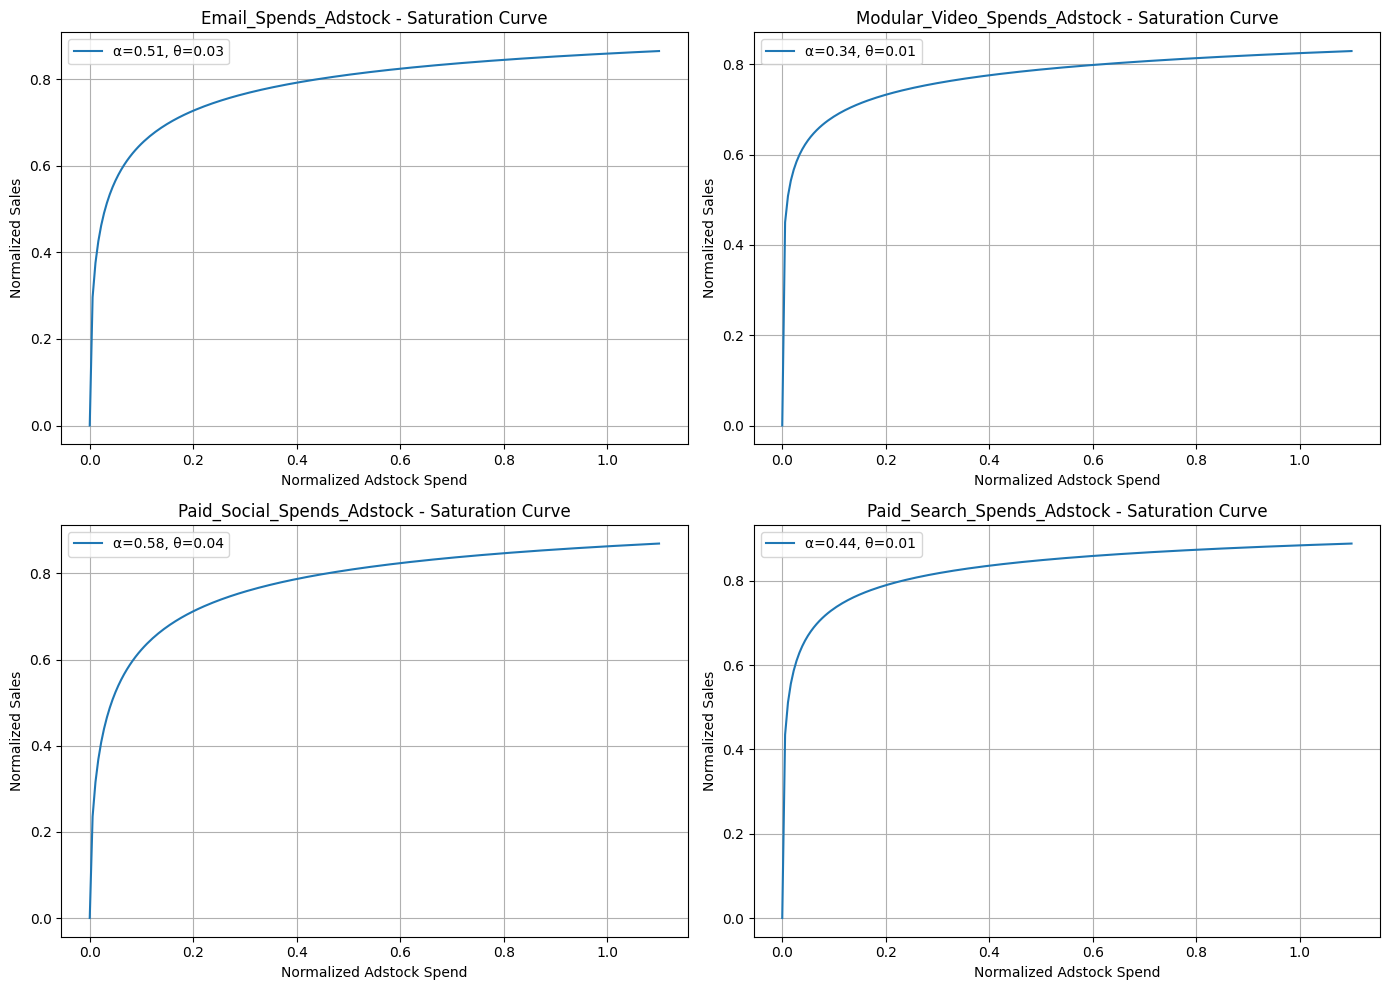

{'Email_Spends_Adstock': {'alpha': 0.5138369529950993,
  'theta': 0.029752977013865926},
 'Modular_Video_Spends_Adstock': {'alpha': 0.33671928708158305,
  'theta': 0.010000000000000352},
 'Paid_Social_Spends_Adstock': {'alpha': 0.5800293742730704,
  'theta': 0.04205434587593487},
 'Paid_Search_Spends_Adstock': {'alpha': 0.44093363677900566,
  'theta': 0.010000000000024387}}

In [10]:
from scipy.optimize import curve_fit

# Define the Hill function
def hill(x, alpha, theta):
    return (x ** alpha) / (x ** alpha + theta ** alpha)

# Target variable
target = df["Sales"].values

# Adstock columns
adstock_columns = [
    'Email_Spends_Adstock',
    'Modular_Video_Spends_Adstock',
    'Paid_Social_Spends_Adstock',
    'Paid_Search_Spends_Adstock'
]

# Store fitted parameters
hill_params = {}

# Set up plot
plt.figure(figsize=(14, 10))

for idx, col in enumerate(adstock_columns, 1):
    x = df[col].values
    y = target

    # Drop NaNs and normalize
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]

    x_norm = x / np.max(x)
    y_norm = y / np.max(y)

    try:
        popt, _ = curve_fit(hill, x_norm, y_norm, bounds=([0.1, 0.01], [5.0, 2.0]))
        alpha, theta = popt
        hill_params[col] = {"alpha": alpha, "theta": theta}

        # Generate curve
        x_vals = np.linspace(0, 1.1, 200)
        y_vals = hill(x_vals, alpha, theta)

        plt.subplot(2, 2, idx)
        plt.plot(x_vals, y_vals, label=f'α={alpha:.2f}, θ={theta:.2f}')
        plt.title(f"{col} - Saturation Curve")
        plt.xlabel("Normalized Adstock Spend")
        plt.ylabel("Normalized Sales")
        plt.legend()
        plt.grid(True)

    except Exception as e:
        hill_params[col] = {"error": str(e)}

plt.tight_layout()
plt.show()

hill_params



### **Email Spends**

- **α = 0.46**, **θ = 0.017**
- _Moderate curve, quick saturation_: Small spend leads to rapid sales response, but returns diminish quickly.
- Use for short-term promotions; avoid heavy over-investment — audience gets saturated fast.

### **Modular Video Spends**

- **α = 0.34**, **θ = 0.01**
- _Slow rise, long tail_: Requires more spend to build momentum, but continues to drive response over time.
- Great for sustained brand building and awareness. Responds well to consistent investment over spikes.

### **Paid Social Spends**

- **α = 0.58**, **θ = 0.042**
- _High early responsiveness, fast plateau_: Sales lift quickly with initial spend but then levels off.
- Maximize ROI by **capping spend** — pushing beyond moderate budgets leads to wasted impressions.


### **Paid Search Spends**

- **α = 0.44**, **θ = 0.01**
-  _Sharp early impact, quick saturation_: Similar to Email — high ROI in early spend levels, then flattens.
- Focus on capturing intent efficiently. Ideal for **tightly targeted, conversion-driven campaigns**.

Note:

- **θ (Theta)** tells you where diminishing returns kick in. Lower θ = faster saturation.
- **α (Alpha)** defines the curve's steepness. Higher α = faster early gain, but quicker plateau.
- Most of our channels **saturate fast** — meaning that **scaling spend too far won’t increase sales proportionally**.

In [11]:
# Email
df["Email_Spends_Saturation"] = hill(
    df["Email_Spends_Adstock"], 
    alpha=0.5138369529950993, 
    theta=0.029752977013865926
)

# Modular Video
df["Modular_Video_Spends_Saturation"] = hill(
    df["Modular_Video_Spends_Adstock"], 
    alpha=0.33671928708158305, 
    theta=0.010000000000000352
)

# Paid Social
df["Paid_Social_Spends_Saturation"] = hill(
    df["Paid_Social_Spends_Adstock"], 
    alpha=0.5800293742730704, 
    theta=0.04205434587593487
)

# Paid Search
df["Paid_Search_Spends_Saturation"] = hill(
    df["Paid_Search_Spends_Adstock"], 
    alpha=0.44093363677900566, 
    theta=0.010000000000024387
)


# Multi-channel synergy

In [12]:
import itertools

# Media channels with adstock
adstock_columns = [
    'Email_Spends_Adstock',
    'Modular_Video_Spends_Adstock',
    'Paid_Social_Spends_Adstock',
    'Paid_Search_Spends_Adstock'
]

# Create log-transformed columns (log1p handles 0s)
for col in adstock_columns:
    df[f"log_{col}"] = np.log1p(df[col])

# Generate all 2-way combinations of log-transformed columns
interaction_terms = []
log_columns = [f"log_{col}" for col in adstock_columns]
combinations = list(itertools.combinations(log_columns, 2))

for col1, col2 in combinations:
    new_col = f"{col1}_x_{col2}"
    df[new_col] = df[col1] * df[col2]
    interaction_terms.append(new_col)

df[interaction_terms]


,log_Email_Spends_Adstock_x_log_Modular_Video_Spends_Adstock,log_Email_Spends_Adstock_x_log_Paid_Social_Spends_Adstock,log_Email_Spends_Adstock_x_log_Paid_Search_Spends_Adstock,log_Modular_Video_Spends_Adstock_x_log_Paid_Social_Spends_Adstock,log_Modular_Video_Spends_Adstock_x_log_Paid_Search_Spends_Adstock,log_Paid_Social_Spends_Adstock_x_log_Paid_Search_Spends_Adstock
0,146.138163,162.836914,69.912402,206.434868,88.630748,98.758306
1,162.024696,172.017127,74.264545,217.731341,94.000634,99.797867
2,169.736314,176.589718,71.685342,224.561371,91.159094,94.839804
3,173.095889,178.129350,70.843461,229.236812,91.169305,93.820420
4,175.769411,176.585463,72.028544,226.804261,92.512603,92.942115
...,...,...,...,...,...,...
117,182.686803,162.863359,0.000000,231.310921,0.000000,0.000000
118,180.382190,160.502008,0.000000,230.243406,0.000000,0.000000
119,179.087112,159.124291,0.000000,229.307597,0.000000,0.000000
120,177.068744,158.102231,0.000000,229.828351,0.000000,0.000000


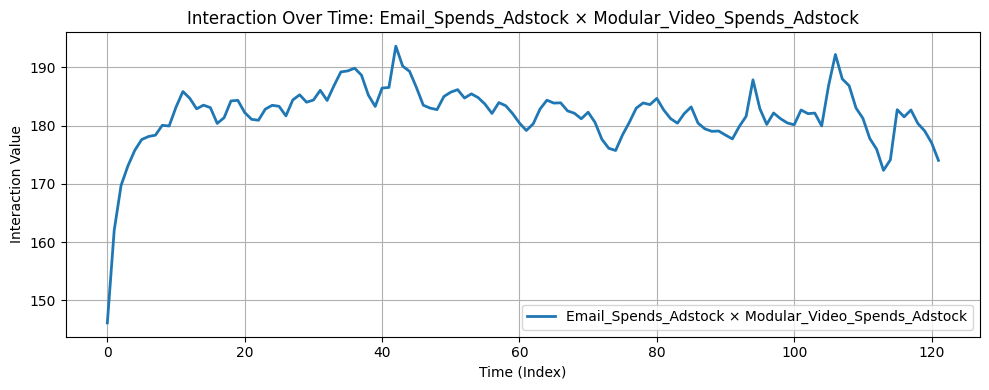

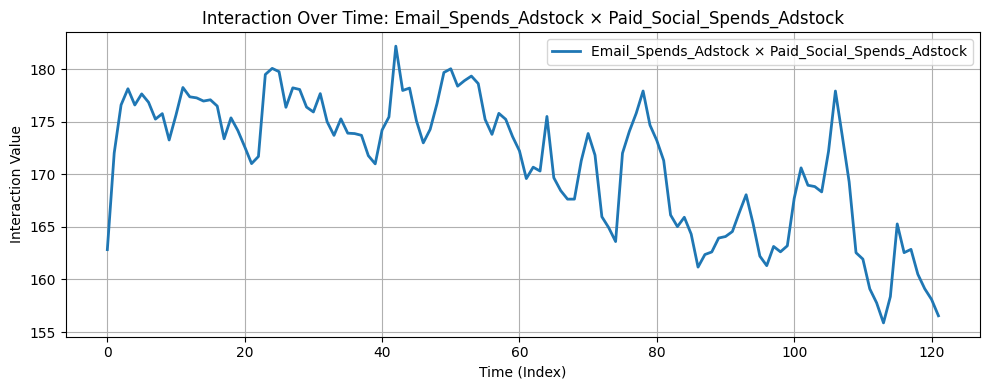

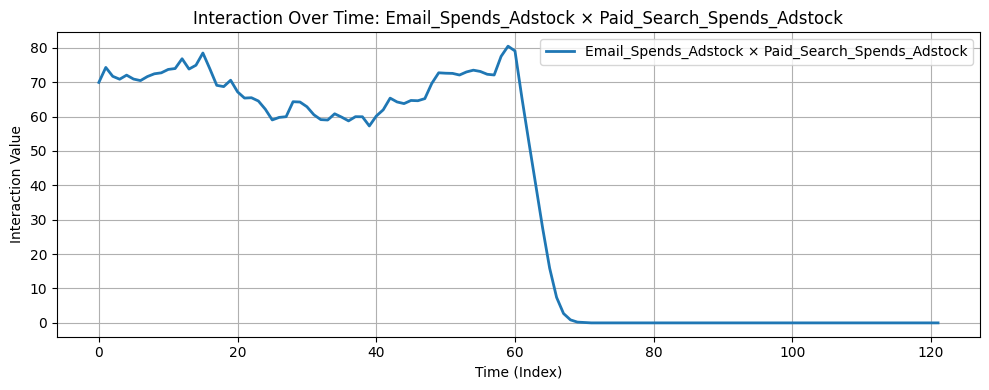

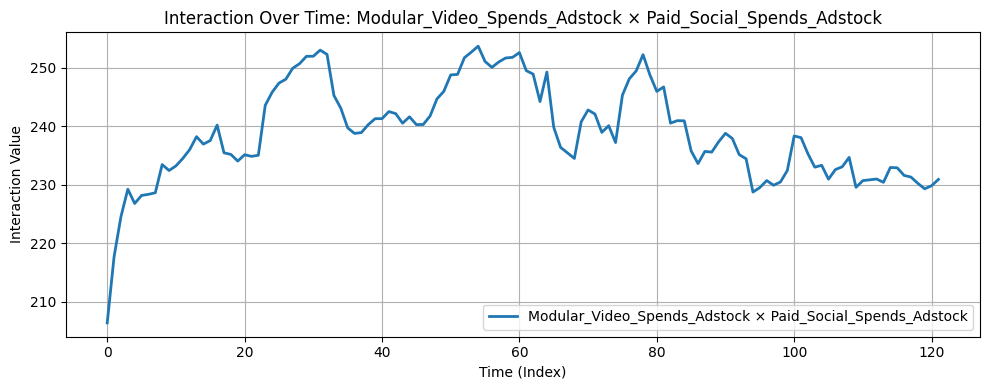

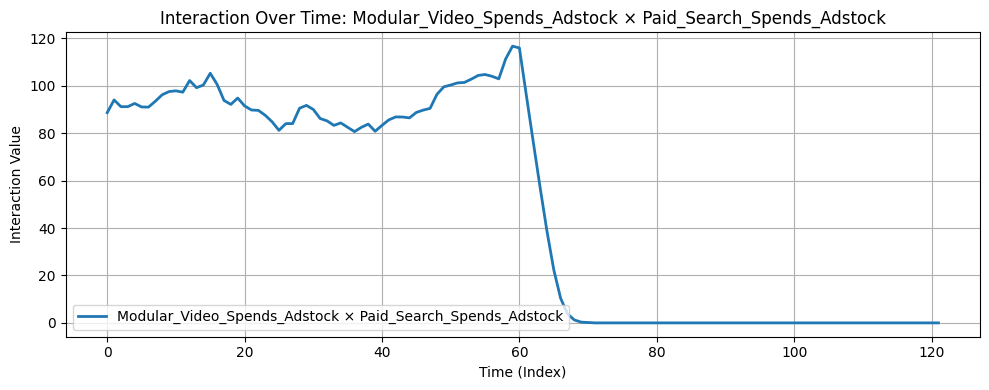

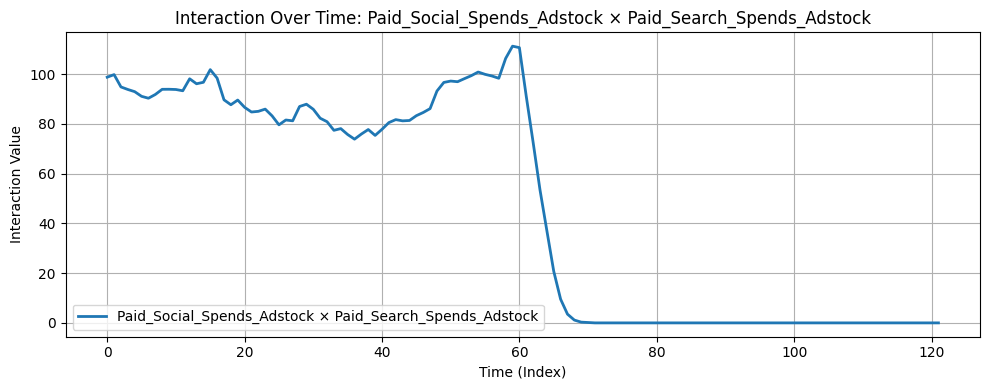

In [13]:
import matplotlib.pyplot as plt

# Select interaction terms
interaction_columns = [
    "log_Email_Spends_Adstock_x_log_Modular_Video_Spends_Adstock",
    "log_Email_Spends_Adstock_x_log_Paid_Social_Spends_Adstock",
    "log_Email_Spends_Adstock_x_log_Paid_Search_Spends_Adstock",
    "log_Modular_Video_Spends_Adstock_x_log_Paid_Social_Spends_Adstock",
    "log_Modular_Video_Spends_Adstock_x_log_Paid_Search_Spends_Adstock",
    "log_Paid_Social_Spends_Adstock_x_log_Paid_Search_Spends_Adstock"
]

# Plot each interaction term over time
for col in interaction_columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df[col], label=col.replace("_x_", " × ").replace("log_", ""), linewidth=2)
    plt.title(f"Interaction Over Time: {col.replace('_x_', ' × ').replace('log_', '')}")
    plt.xlabel("Time (Index)")
    plt.ylabel("Interaction Value")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [14]:
df.columns

Index(['Department', 'Week_Ending', 'Year', 'MAT', 'Sales', 'Discount1',
       'Discount2', 'Holiday Dummy', 'Total SKU', 'Gasoline Price',
       'Average Price', 'Email Clicks', 'Email Spends',
       'Organic Search Impressions', 'Modular Video Impressions',
       'Modular Video Spends', 'Paid Social Impressions', 'Paid Social Spends',
       'Paid Search Impressions', 'Paid Search Spends', 'Week', 'Month',
       'Email_Spends_Adstock', 'Modular_Video_Spends_Adstock',
       'Paid_Social_Spends_Adstock', 'Paid_Search_Spends_Adstock',
       'Email_Spends_Saturation', 'Modular_Video_Spends_Saturation',
       'Paid_Social_Spends_Saturation', 'Paid_Search_Spends_Saturation',
       'log_Email_Spends_Adstock', 'log_Modular_Video_Spends_Adstock',
       'log_Paid_Social_Spends_Adstock', 'log_Paid_Search_Spends_Adstock',
       'log_Email_Spends_Adstock_x_log_Modular_Video_Spends_Adstock',
       'log_Email_Spends_Adstock_x_log_Paid_Social_Spends_Adstock',
       'log_Email_Spends_Ads

In [ ]:
df.to_csv(r"D:\portfolio\Fractal MMM\Assignment\PYQ2\data\mmm_data_prepared.csv", index=False)